# 0. Setup

In [48]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
warnings.filterwarnings('ignore')

# set plotsizes
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
data = pd.read_csv('output/processed_data/1709976233_wrangled_loan_data.csv')

# Section 1: Information for Strategic Stakeholders

## 1.1 Loan Amounts
This plot shows the distribution of loan amounts, helping to understand the typical loan size. As we can se the distribution is right-skewed, with a mean loan amount of approximately 15,000 and a median loan amount of 14,000. This means that the majority of the loan amounts are rather small (50% of the loans are less than 14'000), with a few larger loans (the highest loan amount issued being 35'000).

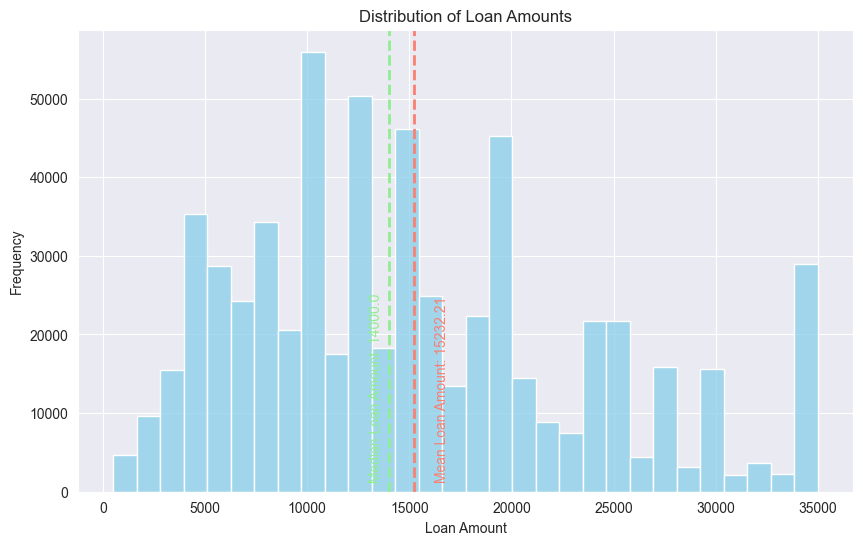

In [49]:
sns.histplot(data=data, x="loan_amnt", bins=30, color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.axvline(data['loan_amnt'].mean(), color='salmon', linestyle='--', linewidth=2)
plt.text(data['loan_amnt'].mean() + 1000, 1600, f'Mean Loan Amount: {round(data["loan_amnt"].mean(), 2)}', rotation=90, color='salmon')
plt.axvline(data['loan_amnt'].median(), color='lightgreen', linestyle='--', linewidth=2)
plt.text(data['loan_amnt'].median() - 1000, 1600, f'Median Loan Amount: {round(data["loan_amnt"].median(), 2)}', rotation=90, color='lightgreen')
plt.show()

## 1.2 Loan Status
Understanding the distribution of loan statuses can inform us about the risk profile. The majority of loans are in the 'Current' category. This is a positive sign, indicating that most borrowers are making timely payments. The categories 'In Grace Period', 'Late (16-30 days)' and 'Late (31-120 days)' have a significantly lower percentage, suggesting that only a few of the borrowers fall into the late payment categories. For the remaining categories the percentage is negligible. In particular, there are seem to be only very few borrowers who meet the categories of 'Default' (0.2%) and 'Charged Off' (0.12%).

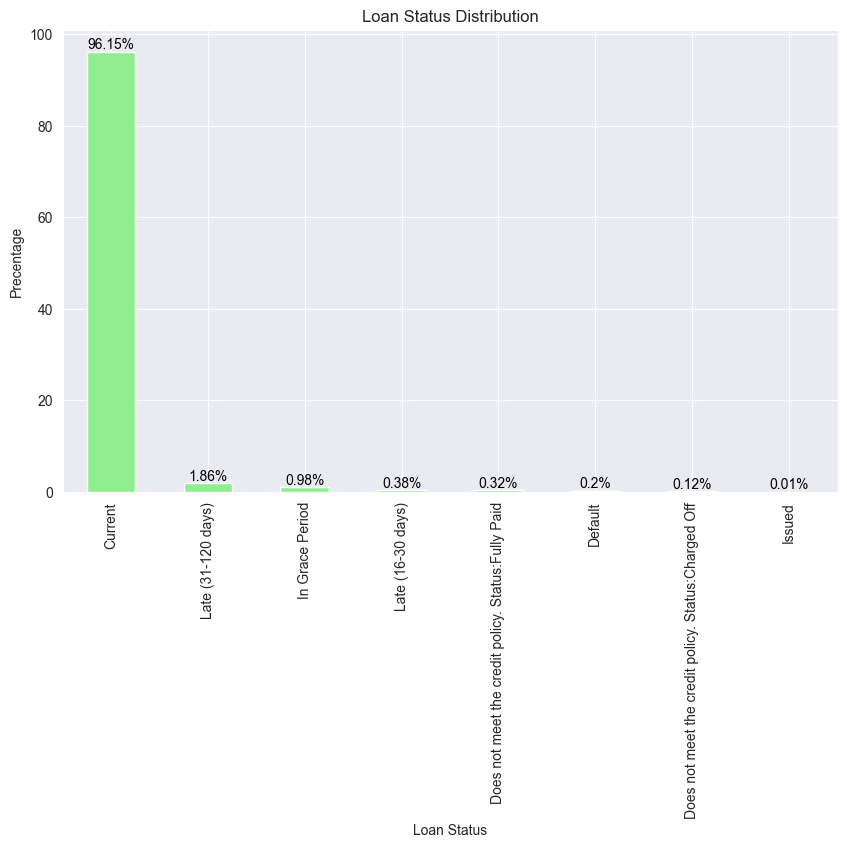

In [50]:
(data['loan_status'].value_counts(normalize=True) * 100).plot(kind='bar', color='lightgreen')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Precentage')
plt.xticks(rotation=90)
for index, value in enumerate(data['loan_status'].value_counts(normalize=True) * 100):
    plt.text(index, value, f'{round(value, 2)}%', ha='center', va='bottom', color='black')
plt.show()

## 1.3 Borrower Grade
The Grade distribution serves to provide an overview of the creditworthiness of the borrowers. A borrower with a highl creditworthiness (e.g. Grade A) is generally considered less risky, then a borrower with a low creditworthiness (e.g. Grade G). The plot reveals that the most common subgrades are 'B' and 'C', each constituting just over 28% of the loans. 'A' subgrade loans make up 16%.  This suggests that a majority of borrowers (ca. 73%) have good creditworthiness.

The proportion of borrowers with "bad" Grades  'C', 'D', 'E', 'F' and 'G' is much lower (ca. 27%). Furthermore, the lowest grade 'G', only makes up 0.56%, indicating that only a small minority of borrowers have very poor creditworthiness.

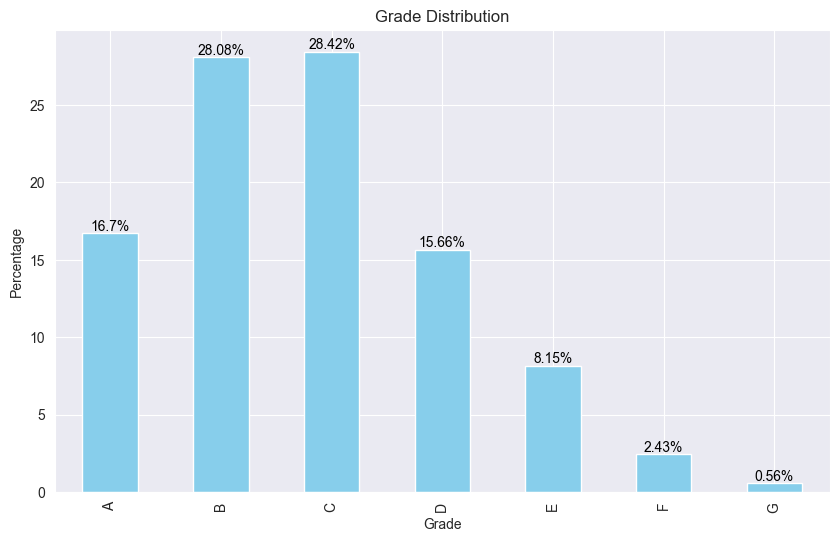

In [51]:
(data['grade'].value_counts(normalize=True).sort_index() * 100).plot(kind='bar', color='skyblue')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Percentage')
for index, value in enumerate(data['grade'].value_counts(normalize=True).sort_index() * 100):
    plt.text(index, value, f'{round(value, 2)}%', ha='center', va='bottom', color='black')
plt.show()

# 2. Information for Analyst Stakeholders

# 2.1 Loan Amount by Grade

The plot explores the distribution of loan amount by credit grade. What becomes immediately apparent is that the median seems to increase with lower grades, with grade 'G' possessing the highest median of all grades. This suggests that borrowers with lower credit grades tend to take out larger loans. Additionally, the size of the boxes and whiskers also provide insights into the variability of loan amounts. Again we can observe that the box-sizes and thereby the variability increases the lower grades become.

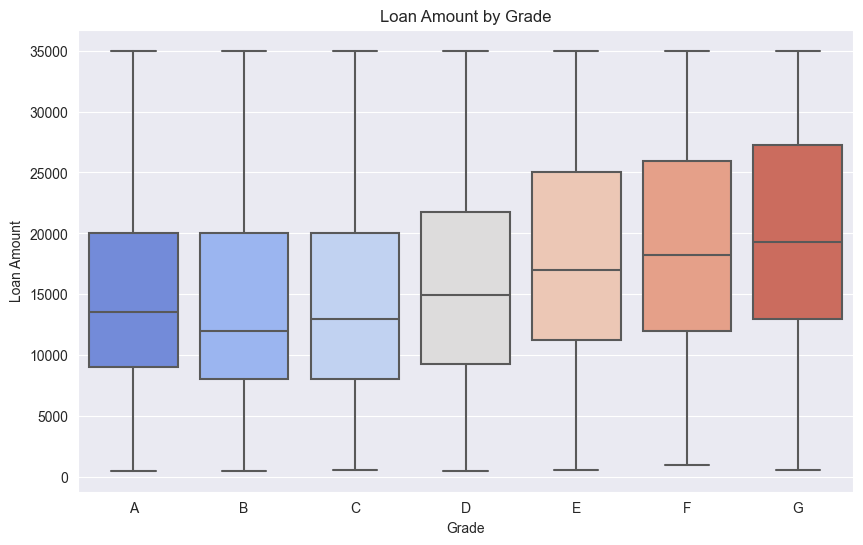

In [52]:
grade_order = sorted(data['grade'].unique())
sns.boxplot(data=data, x='grade', y='loan_amnt', order=grade_order, palette='coolwarm')
plt.title('Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

# 2.2 Loan Status by Grade
The plot shows the distribution of loan status by credit grade. Over all grades the majority of loans fall into the 'Current' category. However, the proportion of 'Current' decreases with lower grades. This is accompanied by an increase in the proportion of the other categories. This indicating that borrowers with lower credit grades pose a greater risk of late payments, not meeting the credit policy and defaulting.

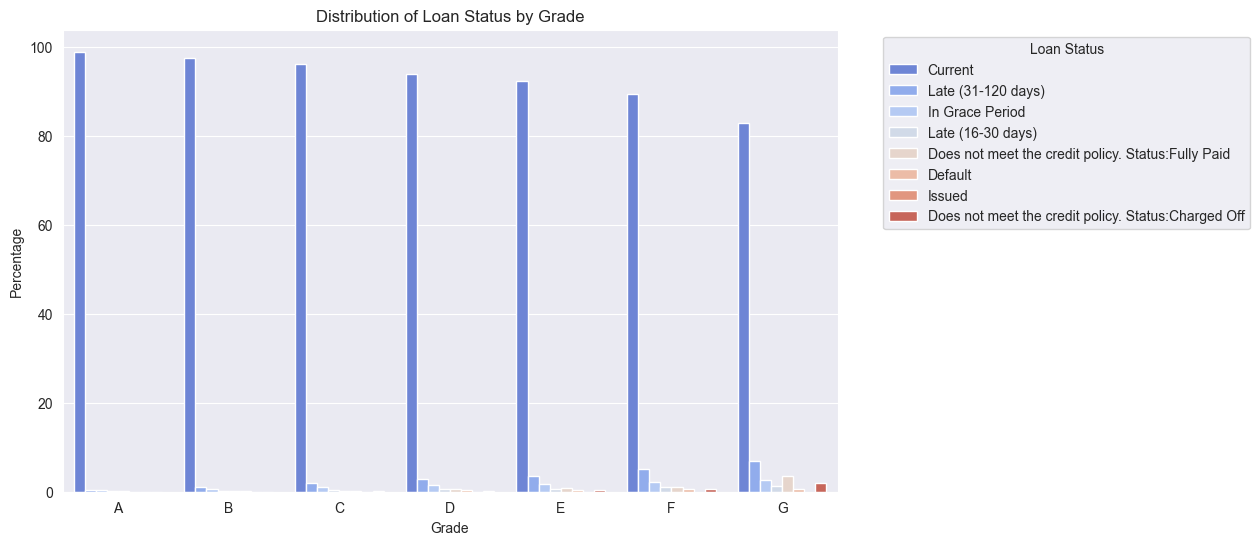

In [53]:
# Calculate the percentages
loan_status_percentages = (data.groupby('grade')['loan_status'].value_counts(normalize=True) * 100).rename('percentage').reset_index()

sns.barplot(data=loan_status_percentages, x='grade', y='percentage', hue='loan_status', palette='coolwarm')
plt.title('Distribution of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2.3 Correlation Heatmap
The following plot shows a correlation heatmap. This can be used to identify linear relationships between numerical features. The heatmap is color-coded to show the strength of the relationship. A positive correlation is indicated by a color closer to red, while a negative correlation is indicated by a color closer to blue. As can be seen 'loan_amnt' is for example positively correlated with many other variables, such as 'installment'.

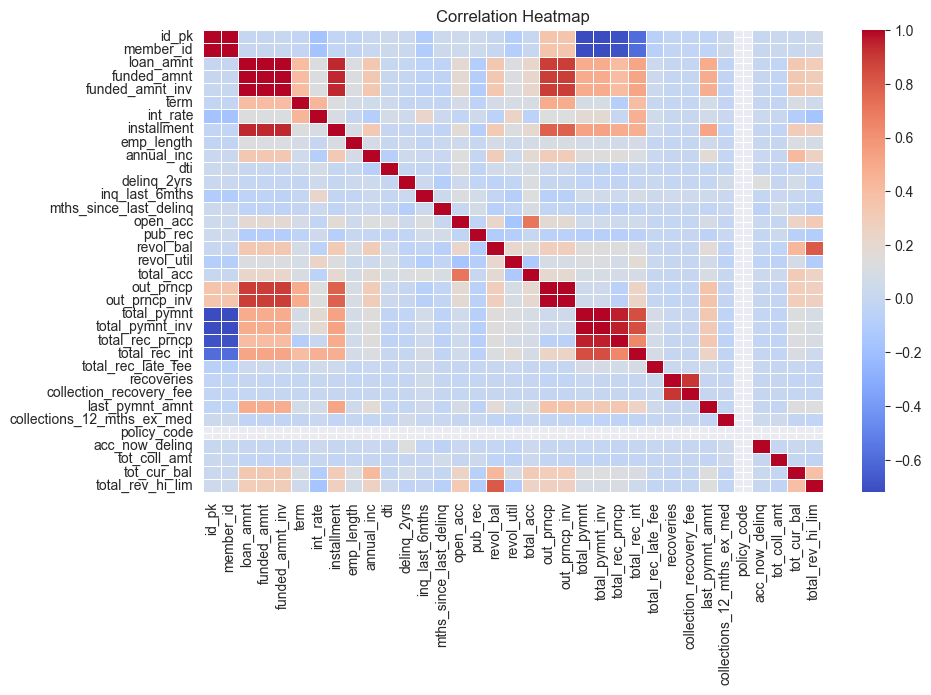

In [54]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap')
plt.show()

# 3. Information for Operational Stakeholders

## 3.1 Missing Values
The plot highlights the columns with missing values. As can be seen the **emp_title** column has the most missing values. This information can be used to inform data collection strategies, that might prevent missing values in the future. E.g. Form Validations could be used to ensure that the user enters a value for the employment title, before he can submit the form.

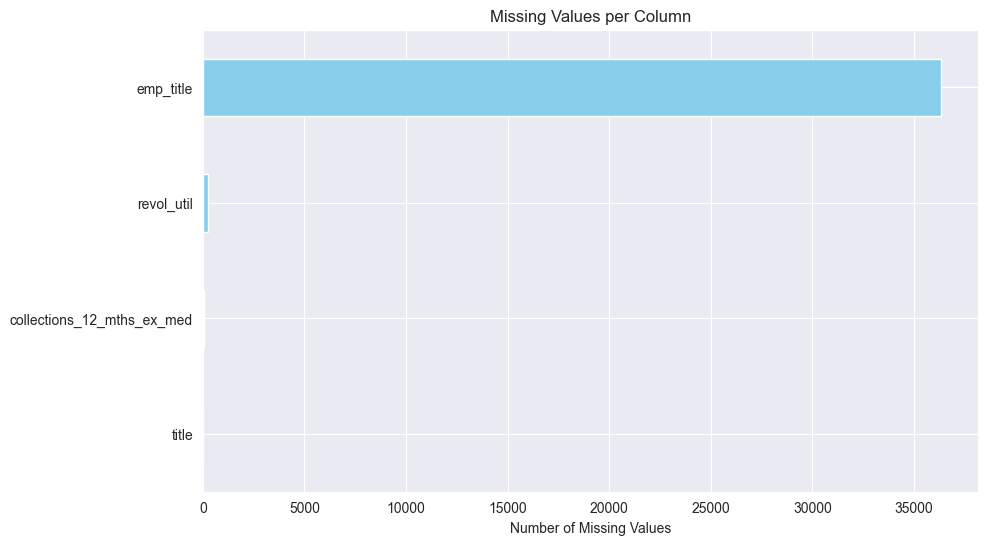

In [55]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values().plot(kind='barh', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.show()

## 3.2 Outliers
The plot shows the annual income distribution. The visualisation suggests that while most incomes fall within a certain expected range, there are notable exceptions on the high end. These outliers might be of particular interest, as they could represent errors in the data or be indicative of a specific group of borrowers we might want to exclude. Again this information can be used to inform data collection strategies, that might prevent outliers in the future. We log-transformed the x-axis to better visualize the distribution of the annual income.

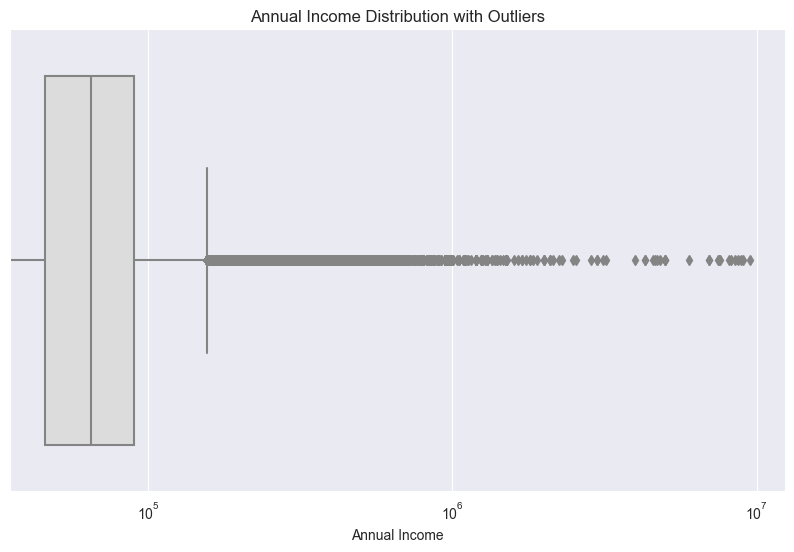

In [56]:
sns.boxplot(data=data, x='annual_inc', palette='coolwarm')
plt.title('Annual Income Distribution with Outliers')
plt.xlabel('Annual Income')
plt.xscale('log')
plt.show()